In [ ]:
!pip install missingno
import missingno as msno

!pip install dtale
import dtale

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#load data
df = pd.read_csv("data set for smart irrigation sysytem.csv")

In [ ]:
# display the first 5 rows of the datset
print(df.head())

          TM         HM      CT    PT     SM
0  27.754298  92.860569  grapes  0.00  79.00
1  27.311557  94.313884  grapes  0.00  72.48
2  28.842710  95.648076  grapes  2.48  78.72
3  26.614235  91.537209  grapes  0.00  67.54
4  29.701432  99.645730  grapes  0.00  72.89


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TM      2399 non-null   float64
 1   HM      2399 non-null   float64
 2   CT      2399 non-null   object 
 3   PT      2399 non-null   float64
 4   SM      2399 non-null   float64
dtypes: float64(4), object(1)
memory usage: 93.8+ KB
None


In [ ]:
print(df.describe())

                TM           HM           PT           SM
count  2399.000000  2399.000000  2399.000000  2399.000000
mean     26.909727    66.598583     5.376178    46.197824
std       6.191914    23.206273    13.601863    24.145357
min       8.825675    10.034048     0.000000     6.040000
25%      23.457737    57.325877     0.000000    26.705000
50%      26.491953    69.995963     0.000000    42.740000
75%      29.367924    83.512296     3.960000    68.505000
max      49.918224    99.981876   156.860000    90.000000


<Axes: >

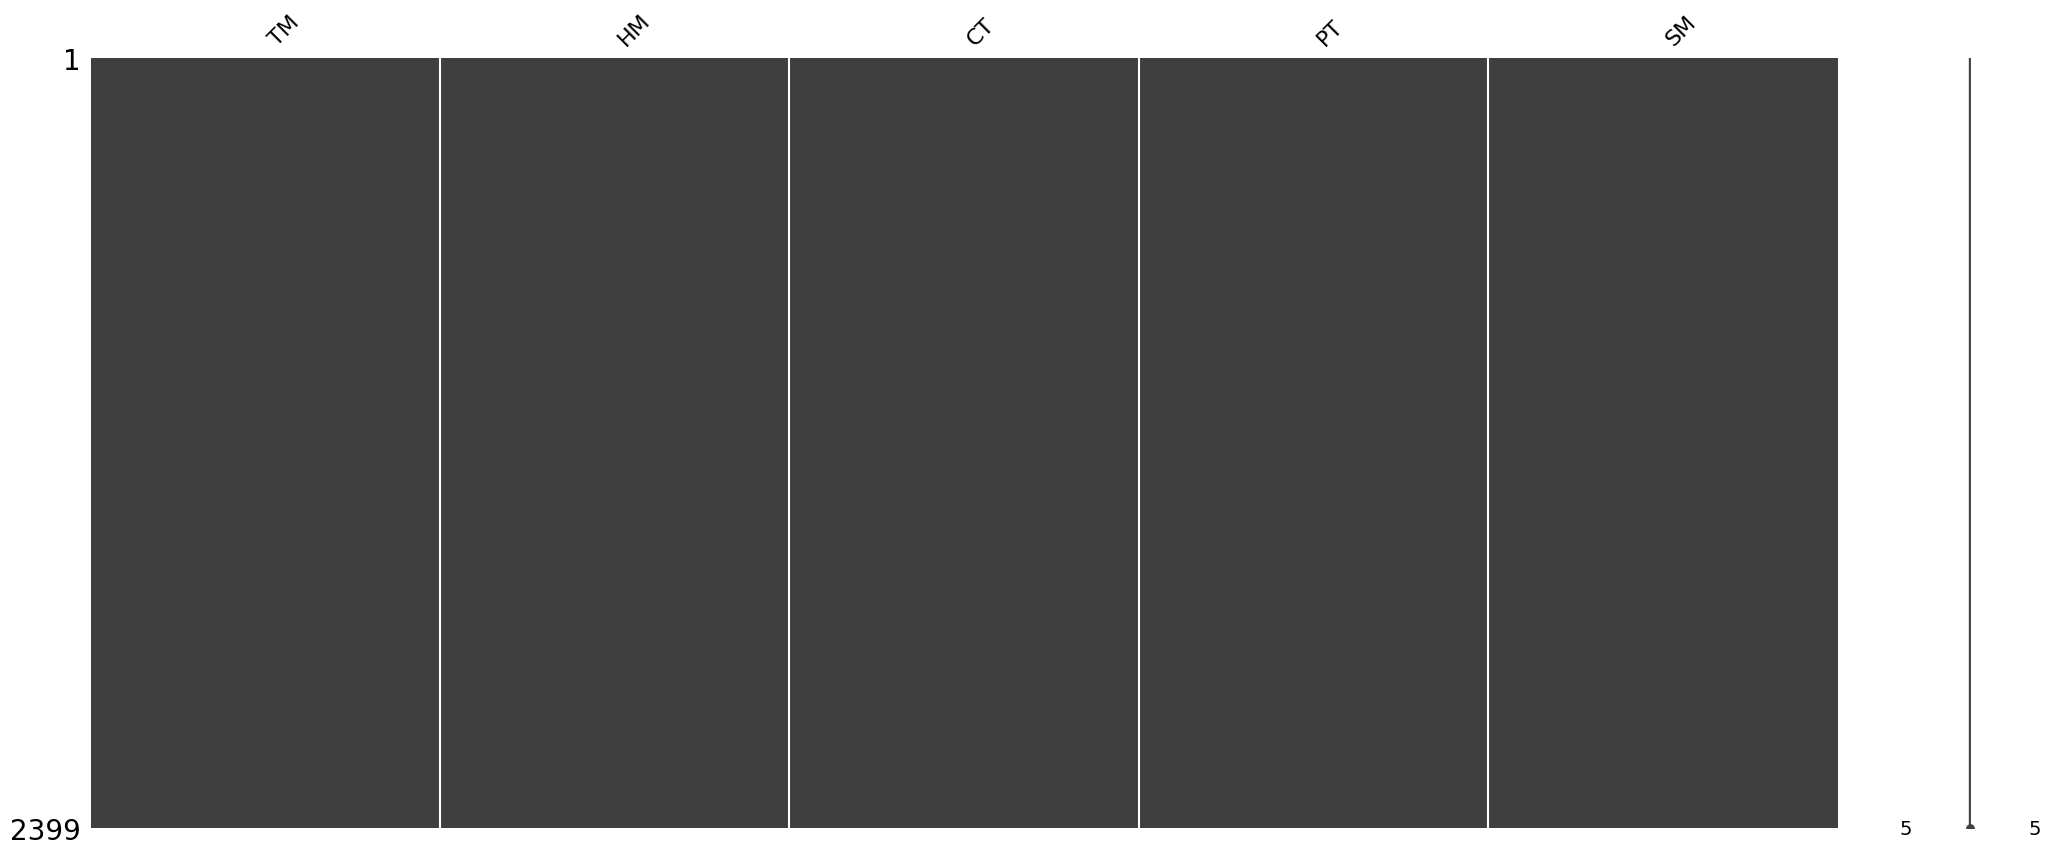

In [ ]:
#visualising missing values
msno.matrix(df)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



<Axes: >

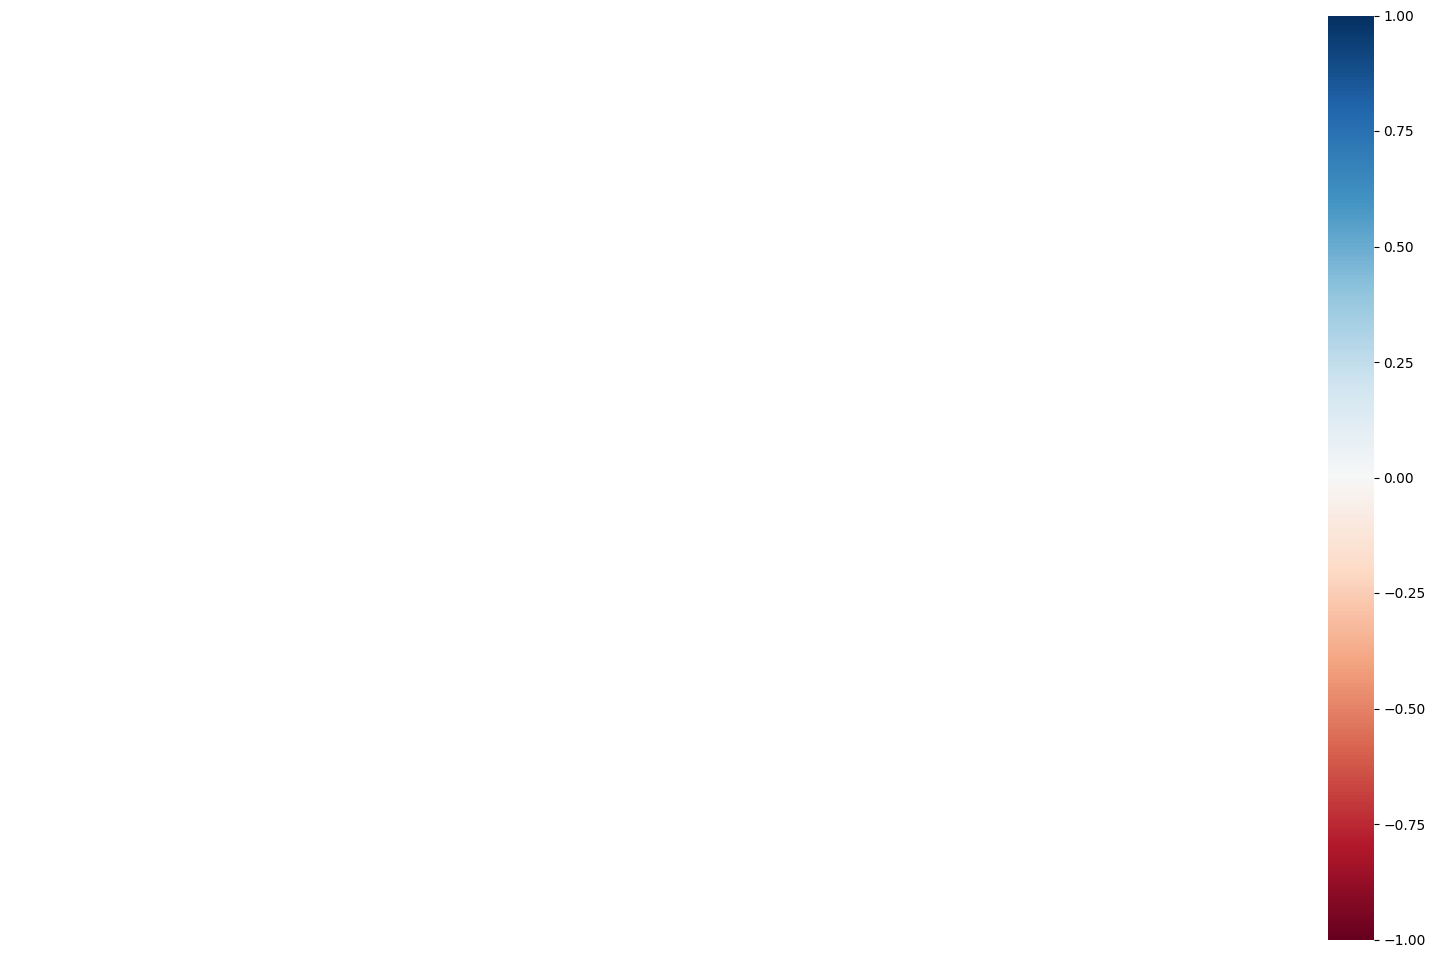

In [ ]:
# Generating the heat map for missing values
msno.heatmap(df)

In [ ]:
#Exhaustive Summary of dataframe
d = dtale.show(df)

data_frame = d.data
print(data_frame)

             TM         HM      CT     PT     SM
0     27.754298  92.860569  grapes   0.00  79.00
1     27.311557  94.313884  grapes   0.00  72.48
2     28.842710  95.648076  grapes   2.48  78.72
3     26.614235  91.537209  grapes   0.00  67.54
4     29.701432  99.645730  grapes   0.00  72.89
...         ...        ...     ...    ...    ...
2394  17.341502  18.756263   wheat  35.00  41.87
2395  17.437327  14.338474   wheat   0.00  43.44
2396  18.897802  19.761829   wheat   0.00  43.10
2397  18.591908  14.779596   wheat   0.00  38.91
2398  18.315615  15.361435   wheat   4.88  44.48

[2399 rows x 5 columns]


In [ ]:
#Counting the instances of a particular values in a column
df.CT.value_counts()

,count
CT,
grapes,300
rice,300
Ground Nut,200
Jute,200
maize,200
papaya,200
Tea,200
watermelon,200
wheat,200


In [ ]:
#Handeling missing values
imputer = SimpleImputer(strategy='mean')

#Handeling the missing values in non-categerological columns with their mean
df.iloc[:, [0,1,3,4]] = imputer.fit_transform(df.iloc[:, [0,1,3,4]])

In [ ]:
#renaming the coulmns
df.columns = ['Temperature','Humidity','Crop_Type','Pump_Time', 'Soil_moisture']

In [ ]:
#Feature Engineering
df['Temp_Humidity_Interaction'] = df ['Temperature']*df['Humidity']

##irrigation needed
df['Irrigation_Needed'] = df['Pump_Time'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df.head()

,Temperature,Humidity,Crop_Type,Pump_Time,Soil_moisture,Temp_Humidity_Interaction,Irrigation_Needed
0,27.754298,92.860569,grapes,0.00,79.00,2577.279903,0
1,27.311557,94.313884,grapes,0.00,72.48,2575.859018,0
2,28.842710,95.648076,grapes,2.48,78.72,2758.749699,1
3,26.614235,91.537209,grapes,0.00,67.54,2436.192762,0
4,29.701432,99.645730,grapes,0.00,72.89,2959.620871,0


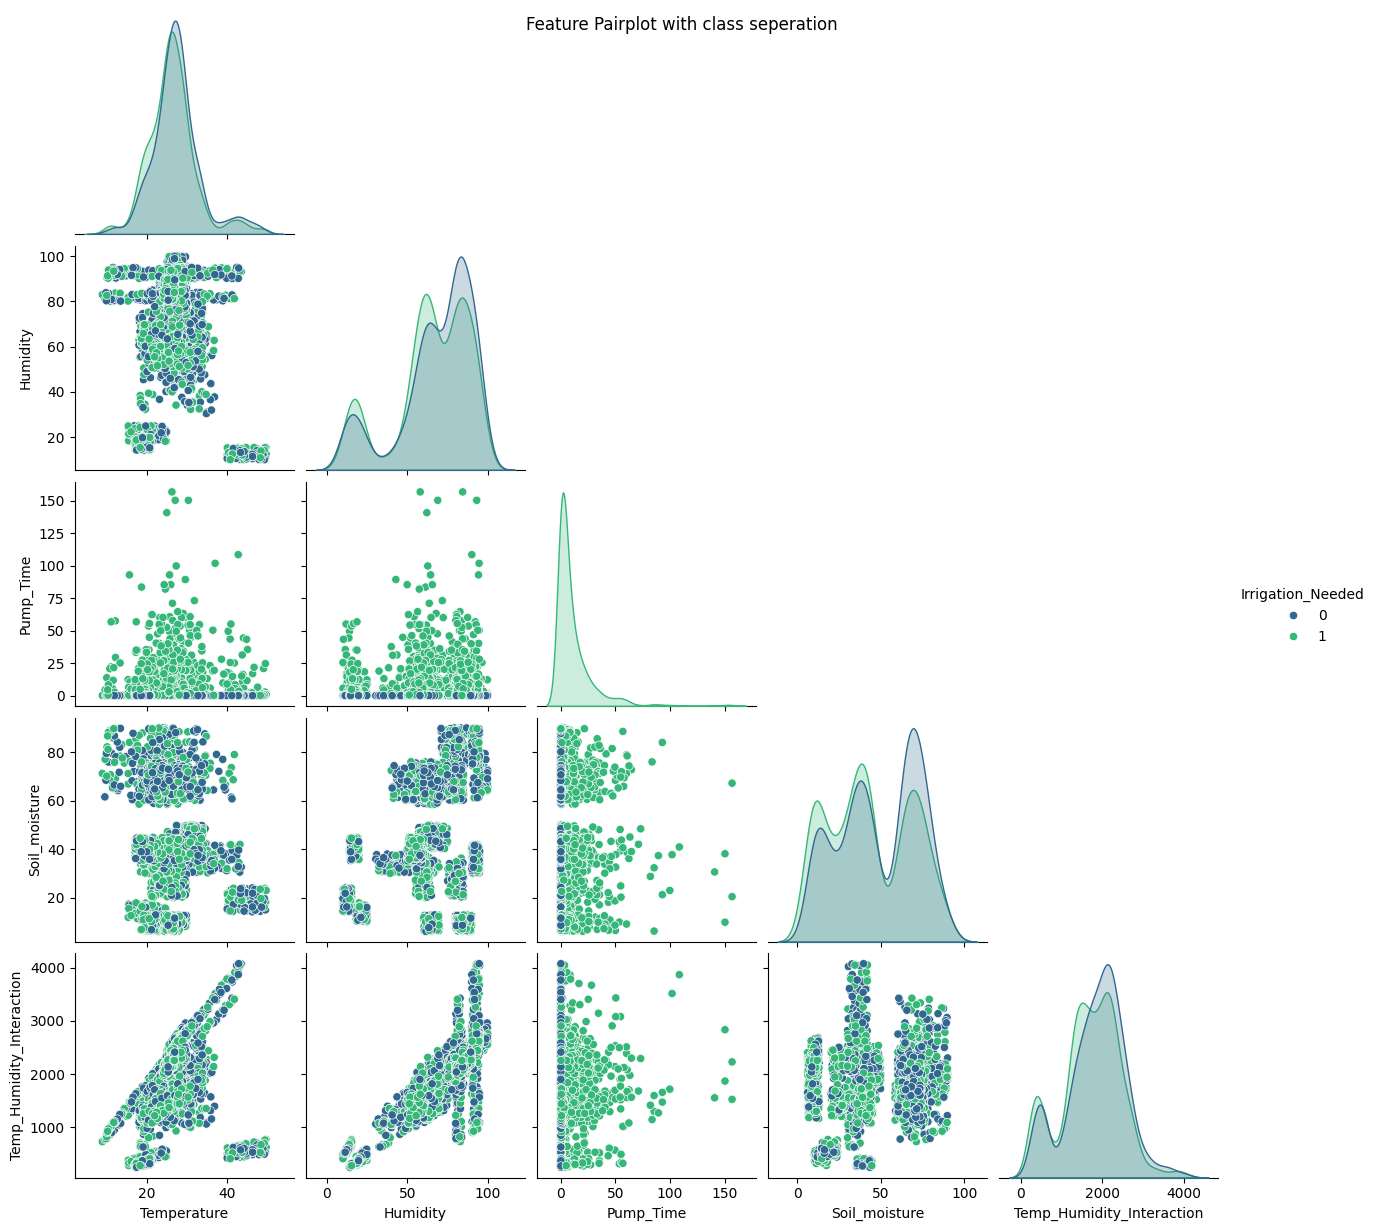

In [ ]:
sns.pairplot(df, hue='Irrigation_Needed', palette='viridis', corner=True)
plt.suptitle('Feature Pairplot with class seperation')
plt.show()

In [ ]:
#Drop Enginered features

if 'Temp_Humidity_Interaction' in df.columns and 'Irrigation_Needed' in df.columns:
    df.drop(['Temp_Humidity_Interaction',   'Irrigation_Needed'], axis=1, inplace=True)

df.head()

,Temperature,Humidity,Crop_Type,Pump_Time,Soil_moisture
0,27.754298,92.860569,grapes,0.00,79.00
1,27.311557,94.313884,grapes,0.00,72.48
2,28.842710,95.648076,grapes,2.48,78.72
3,26.614235,91.537209,grapes,0.00,67.54
4,29.701432,99.645730,grapes,0.00,72.89


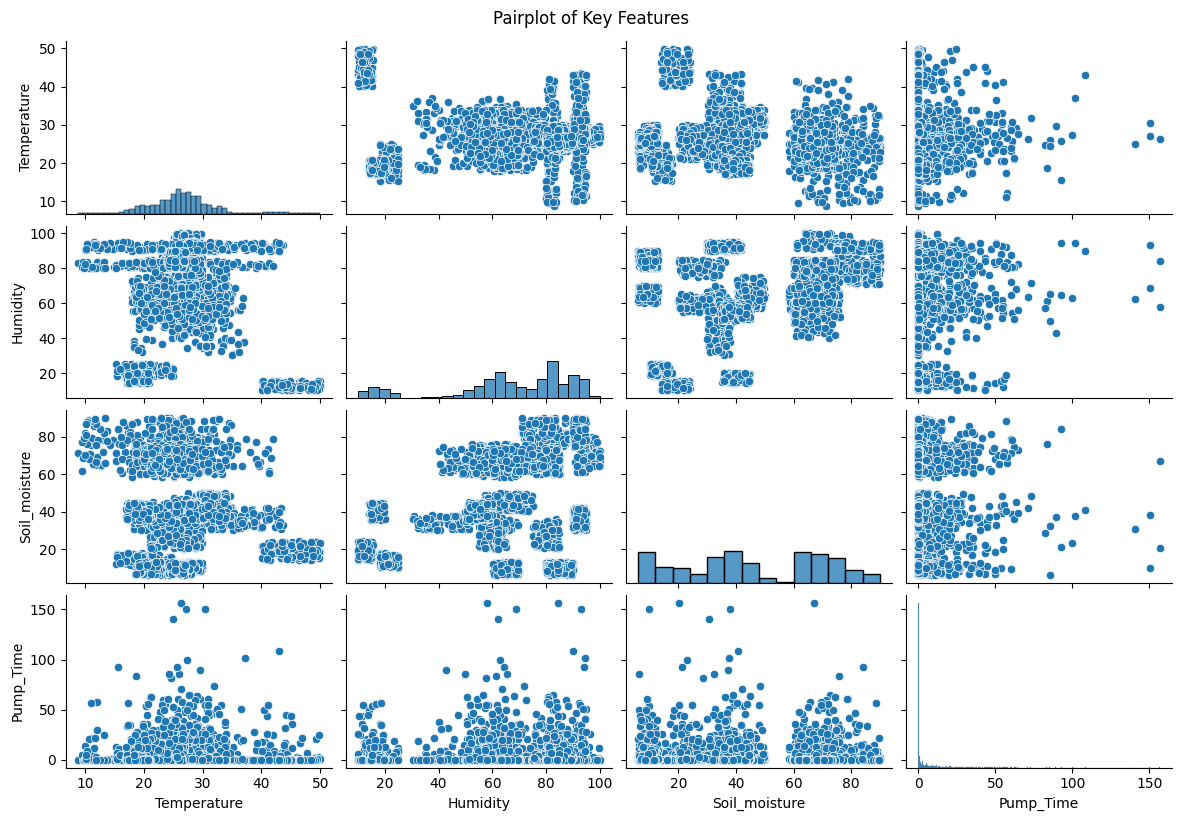

In [ ]:
sns.pairplot(df, vars=['Temperature', 'Humidity', 'Soil_moisture', 'Pump_Time'], height=2, aspect=1.5)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

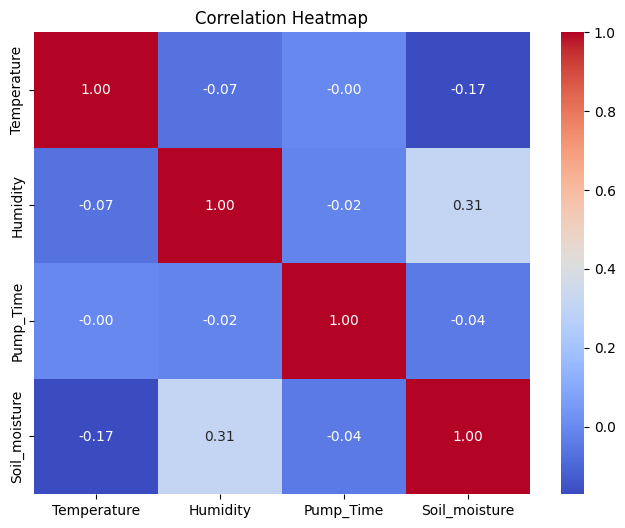

In [ ]:
plt.figure(figsize=(8, 6))
# Include only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Interactive 3D plot
import plotly.express as px

fig = px.scatter_3d(df, x='Temperature', y='Humidity', z='Pump_Time',
                    color='Soil_moisture', title='3D Feature Space')
fig.show()

In [ ]:
#3D suraface graphs
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=df[['Temperature', 'Humidity', 'Pump_Time']].values)])

fig.update_layout(
    scene = dict(
        xaxis_title='Temperature',
        yaxis_title='Humidity',
        zaxis_title='Pump_Time'
    )
)

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.show()

In [ ]:
# Convert the continuous target variable 'SM' into binary classes (0 or 1)
# Change: Define a threshold for soil moisture and convert SM into binary classes
threshold = 50  # Threshold for low vs high moisture
df['Soil_moisture'] = (df['Soil_moisture'] > threshold).astype(int)  # 1 for high moisture, 0 for low moisture


In [ ]:
#Split Dataset

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
#Encoding the crop types
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
df.head()

,Temperature,Humidity,Crop_Type,Pump_Time,Soil_moisture
0,27.754298,92.860569,grapes,0.00,1
1,27.311557,94.313884,grapes,0.00,1
2,28.842710,95.648076,grapes,2.48,1
3,26.614235,91.537209,grapes,0.00,1
4,29.701432,99.645730,grapes,0.00,1


In [ ]:
#View the x Dataest
X.view()

array([[27.754298, 92.86056895, 5, 0.0],
       [27.31155708, 94.3138837, 5, 0.0],
       [28.84270971, 95.64807631, 5, 2.48],
       ...,
       [18.89780215, 19.76182946, 12, 0.0],
       [18.59190771, 14.77959596, 12, 0.0],
       [18.31561493, 15.36143547, 12, 4.88]], dtype=object)

In [ ]:
#View the y Dataest
y.view()

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# importing the ml models and required accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Model Training and Evaluation
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       272
           1       0.98      0.97      0.97       208

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480

KNN Accuracy: 0.9770833333333333


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       208

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Decision Tree Accuracy: 1.0


In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       208

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

Random Forest Accuracy: 1.0


In [ ]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       272
           1       0.62      0.51      0.56       208

    accuracy                           0.65       480
   macro avg       0.64      0.64      0.64       480
weighted avg       0.65      0.65      0.65       480

SVM Accuracy: 0.6520833333333333


In [ ]:
# Get the crop type names and their label-encoded values
crop_types = le.classes_
encoded_values = np.arange(len(crop_types))

# Print the results
for crop, value in zip(crop_types, encoded_values):
  print(f"Crop Type: {crop}, Encoded Value: {value}")


Crop Type: Ground Nut, Encoded Value: 0
Crop Type: Jute, Encoded Value: 1
Crop Type: Kidney Beans, Encoded Value: 2
Crop Type: Pigeon Peas, Encoded Value: 3
Crop Type: Tea, Encoded Value: 4
Crop Type: grapes, Encoded Value: 5
Crop Type: maize, Encoded Value: 6
Crop Type: millet, Encoded Value: 7
Crop Type: muskmelon, Encoded Value: 8
Crop Type: papaya, Encoded Value: 9
Crop Type: rice, Encoded Value: 10
Crop Type: watermelon, Encoded Value: 11
Crop Type: wheat, Encoded Value: 12


In [ ]:
# Create a sample input for prediction
# TM=27.5, HM=90.0, PT=0, CT='Ground Nut'
sample_input = [[27.5, 90.0, 0, 5]]

sample_input_scaled = scaler.transform(sample_input)


In [ ]:
# Predict using the trained models

y_pred_knn = knn.predict(sample_input_scaled)
y_pred_dt = dt.predict(sample_input_scaled)
y_pred_rf = rf.predict(sample_input_scaled)
y_pred_svm = svm.predict(sample_input_scaled)

print("KNN Prediction:", y_pred_knn)
print("Decision Tree Prediction:", y_pred_dt)
print("Random Forest Prediction:", y_pred_rf)
print("SVM Prediction:", y_pred_svm)

KNN Prediction: [1]
Decision Tree Prediction: [0]
Random Forest Prediction: [1]
SVM Prediction: [1]


In [ ]:
import pickle

# Save the model to a pickle file
filename = 'random_forest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))